<a href="https://colab.research.google.com/github/alseo0110/Mosquito-Forecast-System-Analysis/blob/main/data_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

df = pd.read_csv('/content/서울시 모기예보제 정보.csv', encoding='EUC-KR')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df.head()

,모기지수 발생일,모기지수(수변부),모기지수(주거지),모기지수(공원)
0,2025-05-23,0.0,0.0,0.0
1,2025-05-22,100.0,40.5,41.8
2,2025-05-21,100.0,29.6,33.1
3,2025-05-20,85.6,18.9,20.4
4,2025-05-19,80.3,20.9,23.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   모기지수 발생일   1687 non-null   object 
 1   모기지수(수변부)  1687 non-null   float64
 2   모기지수(주거지)  1687 non-null   float64
 3   모기지수(공원)   1687 non-null   float64
dtypes: float64(3), object(1)
memory usage: 52.8+ KB


In [ ]:
df2 = pd.read_csv('/content/기온_수정.csv', encoding='EUC-KR')
df3 = pd.read_csv('/content/습도_수정.csv', encoding='EUC-KR')
df4 = pd.read_csv('/content/바람_수정.csv', encoding='EUC-KR')
df5 = pd.read_csv('/content/강수량_수정.csv', encoding='EUC-KR')

df2.rename(columns={'일시':'모기지수 발생일'}, inplace=True)
df3.rename(columns={'일시':'모기지수 발생일'}, inplace=True)
df4.rename(columns={'일시':'모기지수 발생일'}, inplace=True)
df5.rename(columns={'일시':'모기지수 발생일'}, inplace=True)

In [ ]:
# 1. 첫 번째 데이터프레임(df2)을 기준으로 시작
merged_df = df

# 2. 나머지 데이터프레임을 순서대로 병합
merged_df = pd.merge(merged_df, df2, on='모기지수 발생일', how='outer')
merged_df = pd.merge(merged_df, df3, on='모기지수 발생일', how='outer')
merged_df = pd.merge(merged_df, df4, on='모기지수 발생일', how='outer')
merged_df = pd.merge(merged_df, df5, on='모기지수 발생일', how='outer')


# 3. 결과 확인
merged_df = merged_df.dropna()
print(merged_df.head())

# 4. 파일로 저장
merged_df.to_csv('/content/최종_병합결과.csv', index=False, encoding='EUC-KR')

       모기지수 발생일  모기지수(수변부)  모기지수(주거지)  모기지수(공원)  평균기온(℃)  최고기온(℃)  최저기온(℃)  \
908  2021-05-01       72.6       26.9      23.3     10.2     15.3      8.5   
909  2021-05-02       59.9       22.0      13.3     12.4     18.7      7.3   
910  2021-05-03       59.3       17.5      13.3     14.1     20.3      8.4   
911  2021-05-04       52.6       21.1      10.9     13.8     15.8     11.4   
912  2021-05-05       58.7       25.0      15.2     13.9     18.4     10.3   

      일교차  평균습도(%rh)  최저습도(%rh)  평균풍속(m/s)  강수량(mm)  
908   6.8       80.8       47.0        2.7      8.0  
909  11.4       67.9       41.0        3.1      1.7  
910  11.9       56.4       27.0        2.1      0.0  
911   4.4       82.6       53.0        2.1     19.6  
912   8.1       64.4       29.0        3.5      0.1  


           모기지수(수변부)  모기지수(주거지)  모기지수(공원)   평균기온(℃)   최고기온(℃)   최저기온(℃)  \
모기지수(수변부)   1.000000   0.611469  0.778138  0.654651  0.590131  0.665502   
모기지수(주거지)   0.611469   1.000000  0.681841  0.642851  0.574442  0.650083   
모기지수(공원)    0.778138   0.681841  1.000000  0.777348  0.676038  0.805587   
평균기온(℃)     0.654651   0.642851  0.777348  1.000000  0.951422  0.961038   
최고기온(℃)     0.590131   0.574442  0.676038  0.951422  1.000000  0.842597   
최저기온(℃)     0.665502   0.650083  0.805587  0.961038  0.842597  1.000000   
일교차        -0.271931  -0.268913 -0.391561 -0.231106  0.067428 -0.480503   
평균습도(%rh)   0.216253   0.196799  0.310015  0.197294 -0.023051  0.383950   
최저습도(%rh)   0.297594   0.287143  0.413083  0.295081  0.043174  0.484548   
평균풍속(m/s)   0.046332   0.079397  0.042331 -0.111072 -0.169005 -0.062413   
강수량(mm)     0.116582   0.150738  0.175752  0.033491 -0.091854  0.128822   

                일교차  평균습도(%rh)  최저습도(%rh)  평균풍속(m/s)   강수량(mm)  
모기지수(수변부) -0.271931   0.216253   0

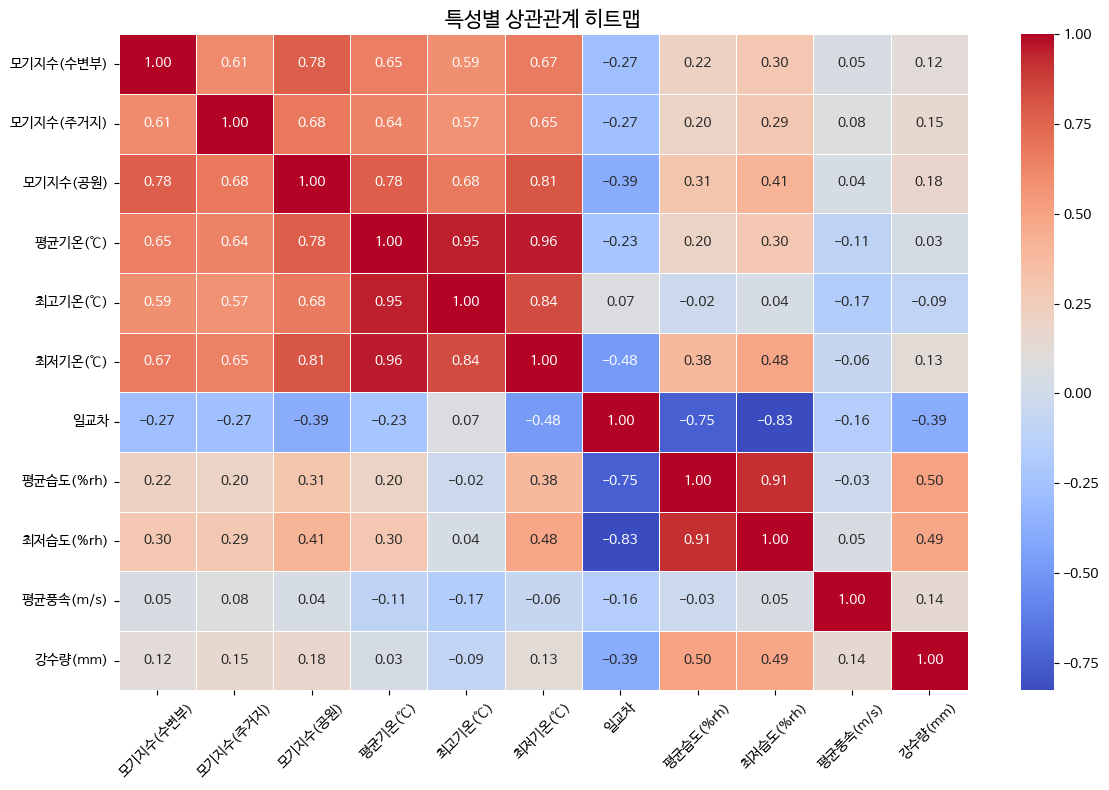

In [ ]:
# 1. 데이터 불러오기
try:
    # 파일 경로 및 인코딩 변경 필요 (EUC-KR 또는 UTF-8)
    file_path = "/content/최종_병합결과.csv"
    df = pd.read_csv(file_path, encoding='EUC-KR')  # EUC-KR, UTF-8 등 파일에 맞게 변경


    # 날짜 컬럼이 있을 경우 제외
    if '모기지수 발생일' in df.columns:
        df = df.drop('모기지수 발생일', axis=1)

    # 2. 상관관계 계산
    corr_matrix = df.corr()
    print(corr_matrix)
    # 3. 상관관계 시각화
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
    plt.rcParams['axes.unicode_minus'] = False     # 마이너스 부호 깨짐 방지
    plt.rc('font', family='NanumBarunGothic')
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                cmap='coolwarm',
                linewidths=0.5,
                annot_kws={"size": 10})
    plt.title("특성별 상관관계 히트맵", fontsize=15)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("에러 발생:", e)
    print("\n※ 문제 해결 체크리스트 ※")
    print("1. 파일 경로가 정확한가요?")
    print("2. 파일 인코딩을 올바르게 설정했나요? (EUC-KR/UTF-8/CP949 등)")
    print("3. CSV 파일의 구분자가 맞나요? (쉼표 외에 탭 등 사용 시 sep='\\t' 추가)")
    print("4. 컬럼 이름에 공백이나 특수문자가 포함되어 있나요?")